**Enunciado**

Uma operadora de seguro de saúde identificou na sua base de dados de clientes, a
relação entre os dados de colesterol e peso com a incidência de problemas que
influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos
seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e
tratamento para esses tipos de causa, a operadora quer realizar um estudo para
identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar
medidas preventivas e palestras de cuidados médicos. 

Para isso, através da análise dos dados, os analistas da operadora de seguro de
saúde identificaram 4 grandes grupos:


1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

**Atividades:**
* Coleta de dados;
* Manipulação e visualização de dados;
* Tratamento de dados;
* Criar agrupamento para 4 grupos distintos;
* Aplicação de algoritmo de Machine Learning não supervisionado KMeans;
* Análise de dados gerados.

**Instalação das bibliotecas utilizadas**

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

# **Coletando dados**

In [1]:
import pandas as pd
#importando os estados brasileiros
estados = pd.read_csv('estados_brasileiros.csv', sep=';', encoding='latin-1')

In [2]:
#Verificando o dataframe
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [3]:
#importando dados dos clientes
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [4]:
#importando idade dos clientes
idade = pd.read_csv('idade_clientes.csv', sep=';', encoding='latin')
idade.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


# **Preparação dos dados**

**Análisando as váriaveis das bases de dados**

In [5]:
#Verificando as informacoes do dataframe de clientes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [7]:
#Verificando alguns numeros do dataframe de clientes
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [8]:
#Verificando as informacoes do dataframe de estados
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [9]:
#Verificando as informacoes do dataframe de idade
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [10]:
#Verificando alguns numeros do dataframe de idade
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


# **Analisando dados ausentes**

In [11]:
#Verificando valores nulos/ausentes na base de dados
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [12]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [13]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [14]:
#Verificando os registros com os valores nulos
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [15]:
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


# **Eliminando dados ausentes**

In [16]:
clientes.dropna(subset=['peso'], inplace=True) #para eliminar o registro. Inplace=True significa que quer alterar os dados naquele dataframe
estados.dropna(subset=['pais'], inplace=True)

In [20]:
#Verificando se todos os valores nulos foram removidos
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [21]:
#Verificando a quantidade de dados que restaram
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [22]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [23]:
estados.count()

id_estado       25
estado          25
sigla_estado    25
pais            25
dtype: int64

# **Substituindo váriável categórica**

In [24]:
#Contando os paises que possui no dataframe
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [25]:
#Inserindo o pais nos valores nulos
estados.pais.fillna('Brasil', inplace=True)

In [26]:
#Verificando se sobrou algum valor nulo
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# **Análisando distribuição dos dados**

In [28]:
import matplotlib.pyplot as plt

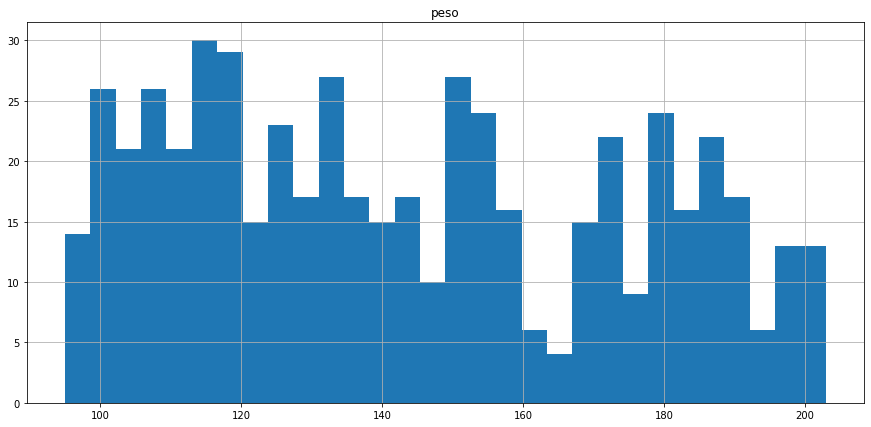

In [29]:
#Inserindo histograma para verificar os dados
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

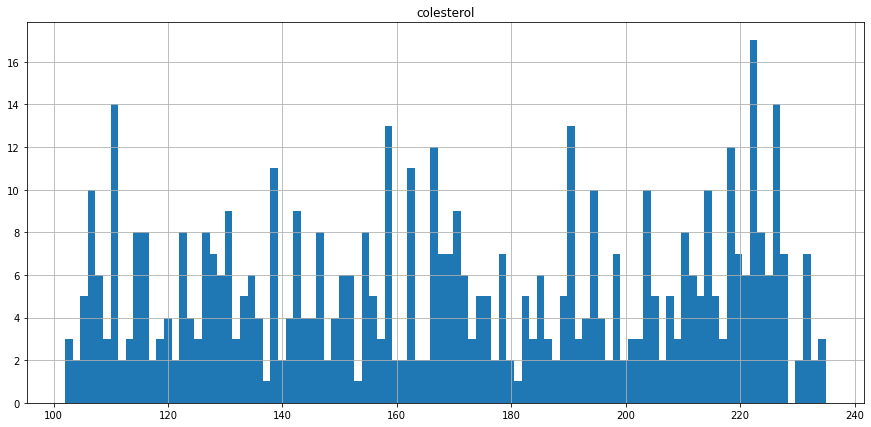

In [30]:
clientes.hist('colesterol', figsize=(15,7), bins=100)
plt.show()

In [31]:
#Criando um identificador para a variavel genero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [32]:
#Foi adicionado uma coluna com numero do genero
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35a189db90>]],
      dtype=object)

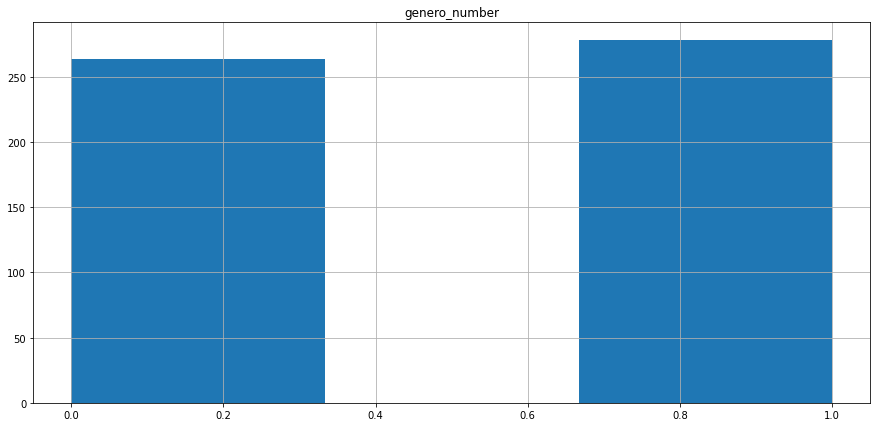

In [34]:
#Verificando a distribuicao por numero do genero
clientes.hist('genero_number', figsize=(15,7), bins=3)

# **Junções entre os dados coletados**

In [36]:
#Visualizando os dados
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [37]:
clientes[:7]

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
5,6,198.0,227,Masculino,8,1
6,7,114.0,131,Masculino,26,1


In [39]:
#Juncao dos dataframes Clientes e Estados pelo ID_Estado
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente') #Ordenando pelo ID_Cliente

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [41]:
#Juncao entre Clientes e Idades pelo ID_Cliente e ordenado pelo ID_Cliente
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [43]:
#Visualizando os dados apos a juncao de todos os dataframes
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [44]:
#Organizar o index
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


# **Organizando a base de dados**

In [45]:
#Alterando nomes das colunas
base_completa.rename(columns={'id_cliente': "cod_cliente", "genero_number": "cod_genero"}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [47]:
#Editando as siglas da coluna sigla_estado, deixando em letra maiuscula
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SE
83     ES
       ..
418    RO
430    AC
155    CE
372    RN
100    ES
Name: sigla_estado, Length: 498, dtype: object

In [48]:
#Inserindo alteracao realizada
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [49]:
#Visualizando os dados apos alteracao
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


# **Alterando a disposição das colunas do arquivo de dados**

In [50]:
#Rascunhando a nova ordem das colunas
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
83,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
430,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
155,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
372,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [51]:
#Mudando a posicao das colunas e resetando o index
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)

In [52]:
#Visualizando os dados apos alteracao
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


# **Análise de dados**

Aplicando método do cotovelo

In [53]:
from sklearn.cluster import KMeans

In [54]:
#Funcao WCSS para criar os agrupamentos
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [55]:
#Separando as colunas Peso e Colesterol para analise
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [56]:
#Aplicando a funcao WCSS nos dados separados
wcss_clientes = calcular_wcss(dados_cliente)

In [57]:
#Visualizando os dados obtidos da funcao WCSS
for i in range(len(wcss_clientes)):
  print(f"O Cluster {i} possui valor de WCSS de: {wcss_clientes[i]}")

O Cluster 0 possui valor de WCSS de: 1248240.6686746986
O Cluster 1 possui valor de WCSS de: 298932.7377352369
O Cluster 2 possui valor de WCSS de: 127842.60787249672
O Cluster 3 possui valor de WCSS de: 73809.93553059456
O Cluster 4 possui valor de WCSS de: 49068.8738718445
O Cluster 5 possui valor de WCSS de: 34064.50002100837
O Cluster 6 possui valor de WCSS de: 25079.92393550797
O Cluster 7 possui valor de WCSS de: 20378.05126656164
O Cluster 8 possui valor de WCSS de: 16003.657266380145
O Cluster 9 possui valor de WCSS de: 13385.38391038145


# **Visualizando o gráfico do cotovelo**

In [58]:
import plotly.express as px #Criação de graficos dinamicos
import plotly.offline as py
import plotly.graph_objects as go #Para criacao e concatenizaçãod de graficos

In [59]:
#Gerando grafico do cotovelo para verificar os agrupamentos
grafico_wcss = px.line(x= range(1,11),
                       y= wcss_clientes)
fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Número de clusters',
                  yaxis_title= 'Valor do WCSS',
                  template = 'plotly_white')
fig.show()

In [63]:
#Iremos trabalhar com 4 grupos
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente) #Inserindo os grupos no dataframe principal

In [64]:
kmeans_clientes

KMeans(n_clusters=4, random_state=0)

In [65]:
#Visualizando os dados apos alteracao
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


# **Calculando os centroides de cada cluster**

In [66]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters
#Aqui temos os centroides dos atributos peso, colesterol e idade

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [67]:
#Visualizando os dados Peso e Colesterol
dados_cliente

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227
...,...,...
493,172.0,207
494,129.0,157
495,107.0,115
496,117.0,147


In [68]:
#Inserindo o gráfico para visualizar os agrupamentos
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

Visualizando e alterando layout do gráfico

In [69]:
grafico = px.scatter(x = base_completa['colesterol'],
                     y = base_completa['peso'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title = 'Análise de Clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'Peso')
fig.show()

# **Criando função para gerar gráfico**

In [70]:
#Funcao para gerar graficos
def plotar_grafico(x,y,xlabel,y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color = base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title = 'Análise de Clusters',
                    xaxis_title = xlabel,
                    yaxis_title = y_label,)
  fig.show()

In [71]:
#Testando a funcao
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [72]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

In [73]:
plotar_grafico(base_completa['idade'], base_completa['colesterol'], 'idade', 'colesterol')

# **Segmentando clientes baseado nas análises de clusters**

Vamos agrupar em 3 grupos:

Alto risco: Peso e colesterol alto

Baixo risco: Baixo peso e colesterol baixo

Moderado risco: Peso e colesterol medianos

In [74]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y],x,y)

In [75]:
cluster_clientes = base_completa

In [76]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0
...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1


In [77]:
#Seguimentando os clientes baseado nas analises dos clusters
cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Risco Moderado Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==3,'nome_cluster'] = 'Risco Moderado Alto'

In [79]:
#Visualizando os dados apos alteracoes
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado Baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado Baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo Risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado Baixo


In [80]:
cluster_clientes.rename(columns={'nome_cluster': "risco"}, inplace=True)
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,risco
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,2,Baixo Risco
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,2,Baixo Risco
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,2,Baixo Risco
3,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,1,Risco Moderado Baixo
4,6,Masculino,17,198.0,227,8,Espírito Santo,ES,Brasil,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,0,Alto Risco
494,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,1,Risco Moderado Baixo
495,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,2,Baixo Risco
496,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,1,Risco Moderado Baixo


# **Análises dos grupos de risco**

In [81]:
#Verificando os valores de idade por grupo de risco
cluster_clientes.groupby('risco')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
risco,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo Risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado Alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado Baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


In [83]:
#Verificando valores de estado por grupo de risco
cluster_clientes.groupby('risco')['estado'].describe()

,count,unique,top,freq
risco,,,,
Alto Risco,142,25,Rio Grande do Sul,10
Baixo Risco,129,25,Amazonas,10
Risco Moderado Alto,106,25,Pernambuco,7
Risco Moderado Baixo,121,25,Sergipe,9


In [84]:
#Verificando clientes do grupo de Alto Risco em Mato Grosso
cluster_clientes.query('risco == "Alto Risco" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,risco
103,112,Masculino,66,179.0,214,11,Mato Grosso,MT,Brasil,0,Alto Risco
142,155,Masculino,16,167.0,204,11,Mato Grosso,MT,Brasil,0,Alto Risco
146,160,Masculino,23,171.0,212,11,Mato Grosso,MT,Brasil,0,Alto Risco
151,168,Masculino,34,184.0,222,11,Mato Grosso,MT,Brasil,0,Alto Risco
178,198,Masculino,28,173.0,211,11,Mato Grosso,MT,Brasil,0,Alto Risco
204,227,Masculino,35,184.0,220,11,Mato Grosso,MT,Brasil,0,Alto Risco
223,248,Masculino,28,171.0,204,11,Mato Grosso,MT,Brasil,0,Alto Risco
329,361,Feminino,34,180.0,218,11,Mato Grosso,MT,Brasil,0,Alto Risco
470,518,Feminino,19,172.0,210,11,Mato Grosso,MT,Brasil,0,Alto Risco


In [85]:
#Verificando os valores de peso por grupo de peso e genero
cluster_clientes.groupby(['risco','genero'])['peso'].describe()

count        mean        std    min     25%  \
risco                genero                                                   
Alto Risco           Feminino    60.0  185.983333   8.032754  168.0  180.00   
                     Masculino   82.0  183.109756  10.743940  167.0  173.25   
Baixo Risco          Feminino    58.0  108.396552   6.472451   96.0  104.00   
                     Masculino   71.0  105.690141   5.953610   95.0  101.50   
Risco Moderado Alto  Feminino    59.0  152.135593   7.300112  140.0  145.00   
                     Masculino   47.0  152.553191   6.730232  140.0  148.00   
Risco Moderado Baixo Feminino    63.0  129.317460   7.079788  116.0  125.00   
                     Masculino   58.0  125.672414   6.383608  115.0  120.25   

                                  50%     75%    max  
risco                genero                           
Alto Risco           Feminino   186.0  192.00  203.0  
                     Masculino  182.0  189.75  203.0  
Baixo Risco          Feminino   110.0  113.00  118.0  
                     Masculino  105.0  110.00  118.0  
Risco Moderado Alto  Feminino   154.0  157.00  169.0  
                     Masculino  151.0  154.50  168.0  
Risco Moderado Baixo Feminino   129.0  135.00  142.0  
                     Masculino  125.5  131.00  140.0

In [86]:
#Verificando os valores de colesterol por grupo de risco
cluster_clientes.groupby('risco')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
risco,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado Alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado Baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


In [87]:
#Verificando os valores de peso por grupo de risco
cluster_clientes.groupby('risco')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
risco,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


# **Exportar dados**

In [ ]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1')